In [1]:
import numpy as np
import pandas as pd
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from src.forecast_usage_and_access import ForecastAccessAndUsage

In [2]:
ethiopia_fi_unified_data = pd.read_excel("../data/processed/ethiopia_fi_unified_data.xlsx")
impact_df = pd.read_excel(
    "../data/processed/ethiopia_fi_unified_data.xlsx", 
    sheet_name="Impact_sheet", 
)


In [3]:
# 1. Load observations, events, impact_links from Ethiopia FI dataset
observations = ethiopia_fi_unified_data[ethiopia_fi_unified_data['record_type'] == 'observation']
events = ethiopia_fi_unified_data[ethiopia_fi_unified_data['record_type'] == 'event']

# 2. Define indicator metadata
INDICATORS = {
    'ACC_OWNERSHIP': {'name': 'Account Ownership Rate', 'unit': '%', 'direction': 'higher_better'},
    'DIG_PAY': {'name': 'Digital Payment Usage (Any)', 'unit': '%', 'direction': 'higher_better'},
    'ACC_MM_ACCOUNT': {'name': 'Mobile Money Account Rate', 'unit': '%', 'direction': 'higher_better'},
    'USG_ACTIVE_RATE': {'name': 'Mobile Money Activity Rate', 'unit': '%', 'direction': 'higher_better'},
    'USG_P2P_COUNT': {'name': 'P2P Transaction Count', 'unit': 'transactions', 'direction': 'higher_better'},
    'USG_TELEBIRR_USERS': {'name': 'Telebirr Registered Users', 'unit': 'users', 'direction': 'higher_better'},
}
# 3. Initialize forecasting class
forecast_model = ForecastAccessAndUsage(observations, events, impact_df, INDICATORS)


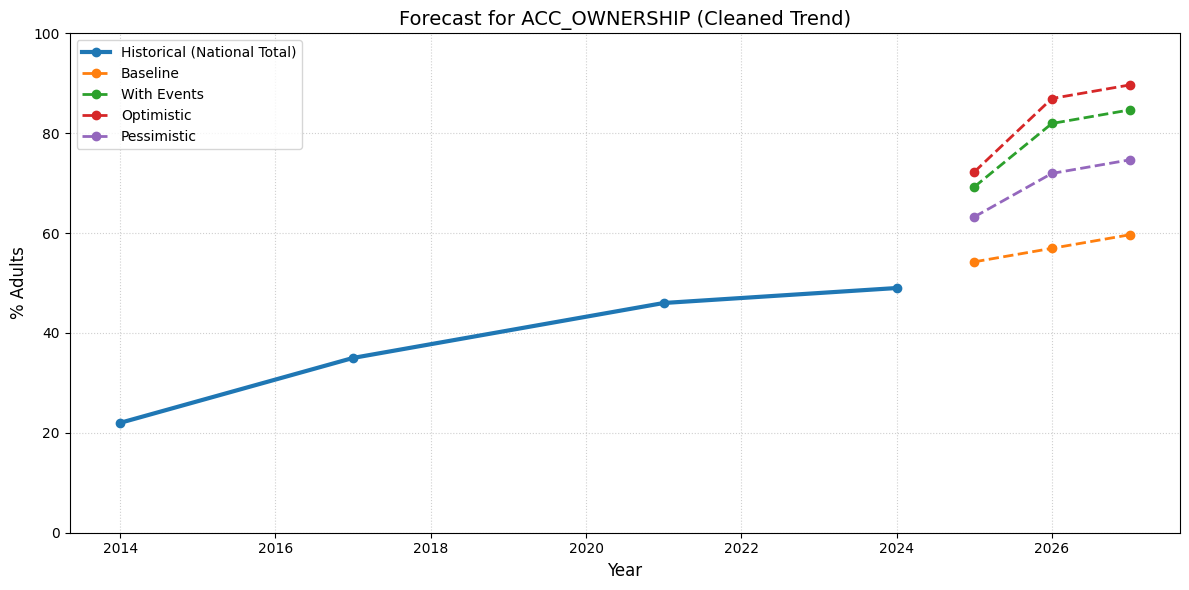

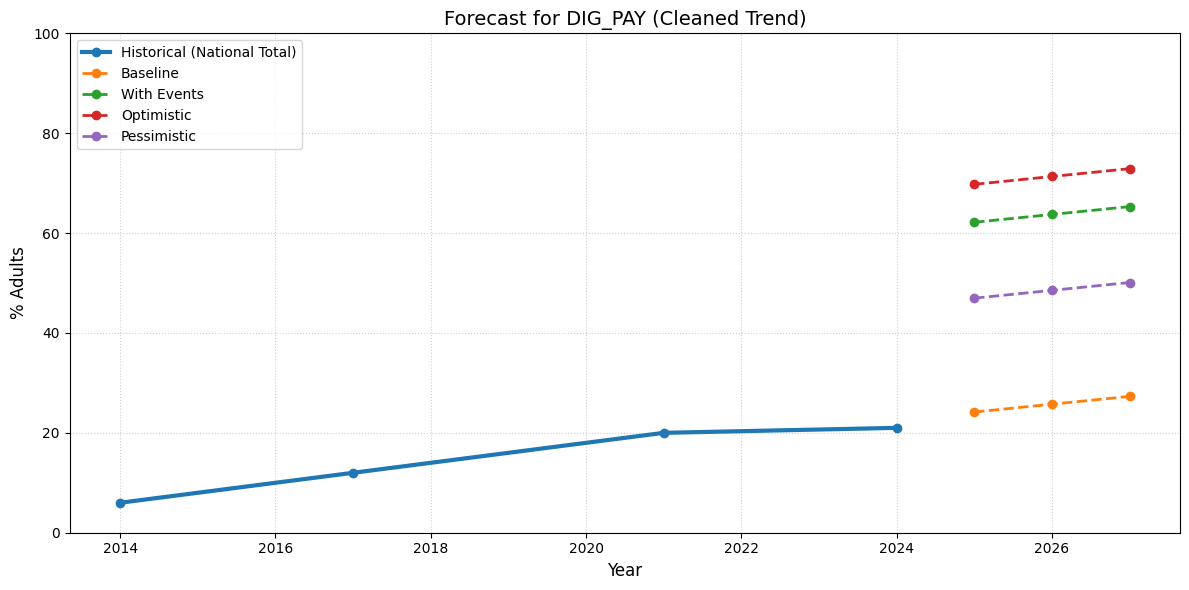

,parent_id,impact_estimate,lag_months,confidence,evidence_basis
0,EVT_0001,15.0,12,medium,literature
7,EVT_0004,10.0,24,medium,literature
23,EVT_0015,75.0,48,NaN,literature


,parent_id,impact_estimate,lag_months,confidence,evidence_basis
24,EVT_0011,8.0,12,NaN,empirical
25,EVT_0013,10.0,1,NaN,empirical
26,EVT_0014,5.0,6,NaN,theoretical
27,EVT_0020,15.0,1,NaN,theoretical


,Scenario,Forecast
0,baseline,59.655172
1,with_events,84.655172
2,optimistic,89.655172
3,pessimistic,74.655172


,Scenario,Forecast
0,baseline,27.301724
1,with_events,65.301724
2,optimistic,72.901724
3,pessimistic,50.101724


,Scenario,Forecast
0,baseline,27.301724
1,with_events,65.301724
2,optimistic,72.901724
3,pessimistic,50.101724


In [4]:
# 1. Account Ownership Forecast
forecast_model.generate_scenarios("ACC_OWNERSHIP")
forecast_model.plot_forecasts("ACC_OWNERSHIP")

# 2. Digital Payment Usage Proxy Forecast
forecast_model.generate_scenarios("DIG_PAY")
forecast_model.plot_forecasts("DIG_PAY")

# Contribution explanation
forecast_model.explain_contributions("ACC_OWNERSHIP")
forecast_model.explain_contributions("DIG_PAY")

# Forecast table
# Forecast table for 2027
forecast_model.forecast_summary(2027, "ACC_OWNERSHIP")
forecast_model.forecast_summary(2027, "DIG_PAY")
